# MEMERAG

# ARCHITECTURE

In [ ]:
📁 meme_rag/
├── 📁 meme_fns/          # 👈 Utility scripts
│   ├── memes_list.py
│   ├── emotion_utils.py
│   └── (optional: meme_loader.py)
├── 📁 meme_config/       # 🔒 Private configs like keys
│   └── openai_key.txt
├── 📁 memes/             # 📷 Your meme images / gifs
├── bot_runner.ipynb      # 🚀 Your main Colab notebook
├── README.md             # (optional, for project description)


# BASIC RUN

In [1]:
!pip install langchain
!pip install chromadb
!pip install sentence-transformers
!pip install faiss-cpu
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.4/188.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 10.7 MB/s eta 0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
pip install --upgrade openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.0/662.0 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.76.2
    Uninstalling openai-1.76.2:
      Successfully uninstalled openai-1.76.2


### 0. LOAD CONTENT & IMPORTS

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load key manually from plain .txt
with open('/content/drive/MyDrive/meme_rag/meme_config/openai_key.txt', 'r') as f:
    openai_key = f.read().strip()

print("✅ Key Loaded:", openai_key.startswith("sk-"))


✅ Key Loaded: True


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/meme_rag')

In [ ]:
# Local Path
import shutil
import os

MEME_FOLDER_DRIVE = '/content/drive/MyDrive/meme_rag/memes' # Your Drive path
MEME_FOLDER_LOCAL = '/content/memes_local' # Local Colab path


In [ ]:
# === 1. Imports ===
# (Later import actual libraries: langchain, chroma, faiss, huggingface, etc.)

import os, shutil, random
import numpy as np
import pandas as pd
import openai
import faiss
from sentence_transformers import SentenceTransformer
from IPython.display import HTML, Image, display
from openai import OpenAI
from datetime import datetime
import time



In [ ]:
# === 1. Embedder ===
class Embedder:
    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
    def embed(self, text: str) -> np.ndarray:
        return self.model.encode([text])[0]


In [ ]:
# === 2. Retriever ===
class Retriever:
    def __init__(self, dim=384):
        self.index = faiss.IndexFlatL2(dim)
        # Store memes with their original index IDs for easy lookup
        self.memes_by_id = {}
        self.next_id = 0

    def add_documents(self, memes: list, embedder: Embedder):
        """
        memes: list of dict, each {'caption':..., 'image':..., 'emotion':... (optional)}
        """
        vecs = []
        ids_to_add = []
        for m in memes:
            vecs.append(embedder.embed(m['caption']))
            current_id = self.next_id
            self.memes_by_id[current_id] = m # Store meme data keyed by FAISS ID
            ids_to_add.append(current_id)
            self.next_id += 1

        if vecs:
            # Use IndexIDMap to map FAISS internal IDs to our custom IDs
            self.index = faiss.IndexIDMap(faiss.IndexFlatL2(self.index.d))
            self.index.add_with_ids(np.vstack(vecs), np.array(ids_to_add, dtype='int64'))
            print(f"✅ Indexed {len(vecs)} memes.")
        else:
            print("⚠️ No vectors to add to index.")


    def retrieve(self, query_vec: np.ndarray, top_k=10, emotion=None) -> list: # Increase initial top_k
        if self.index.ntotal == 0:
            print("⚠️ Index is empty. Cannot retrieve.")
            return []

        # 1. Search the main index for more candidates initially
        #    Increase k because filtering will remove some results.
        search_k = top_k * 5 # Or some other multiplier, adjust as needed
        search_k = min(search_k, self.index.ntotal) # Can't retrieve more than exist

        D, I = self.index.search(np.array([query_vec]), search_k)

        # Get the actual meme data using the retrieved IDs
        initial_results = [self.memes_by_id[idx] for idx in I[0] if idx != -1] # idx can be -1 if k > ntotal

        if not initial_results:
            return []

        # 2. Filter these results by emotion, if applicable
        if emotion and emotion != "neutral": # Assuming 'neutral' means no filter
            filtered_results = [
                meme for meme in initial_results
                if meme.get("emotion") == emotion
            ]
            if not filtered_results:
                print(f"⚠️ No top memes found for emotion: {emotion}. Falling back to general results.")
                # Fallback: return top_k general results instead of empty list
                return initial_results[:top_k]
            else:
                # Return the top_k emotionally relevant results
                return filtered_results[:top_k]
        else:
            # No emotion filter needed, just return the top_k overall results
            return initial_results[:top_k]

In [ ]:
# === 3. Generator ===
class MemeSelector:
    def __init__(self):
        pass
    def generate(self, query: str, context: list) -> str:
        """
        context: list of meme dicts, pick the top one.
        Returns: the filename of the meme to display.
        """
        if not context:
            return None
        return context[0]['image']


In [ ]:
# === 4. RAG Pipeline Manager ===
class MemeRAGManager:
    def __init__(self, embedder, retriever, selector):
        self.embedder = embedder
        self.retriever = retriever
        self.selector  = selector
    def run(self, user_query: str) -> str:
        qv      = self.embedder.embed(user_query)
        cands   = self.retriever.retrieve(qv)
        pick    = self.selector.generate(user_query, cands)
        return pick  # e.g. "sadge_pepe.png"

In [ ]:
class ContextualMemeRAGManager:
    def __init__(self, embedder, retriever, selector):
        self.embedder = embedder
        self.retriever = retriever
        self.selector = selector

    def run(self, user_query: str, context_tag: str = None) -> str:
        # Embed the query
        qv = self.embedder.embed(user_query)

        # Retrieve a candidate pool (bigger for filtering)
        candidates = self.retriever.retrieve(qv, top_k=10)

        # --- Context tag filtering ---
        if context_tag:
            filtered = [m for m in candidates if context_tag in m.get("context_tags", [])]
            final = filtered if filtered else candidates  # fallback if no matches
        else:
            final = candidates  # no context tag filtering

        # Select the meme from the final candidates
        pick = self.selector.generate(user_query, final)
        return pick


# EMOTIONAL UTILS

In [ ]:
def filter_by_emotion(memes, target_emotion):
    """
    Filter meme list by emotion.
    """
    return [m for m in memes if m.get("emotion") == target_emotion]

In [ ]:
def get_emotion_from_message(msg):
    """
    Infer emotion based on simple keyword matching.
    """
    msg = msg.lower()
    if any(word in msg for word in ["sad", "down", "depressed", "cry"]):
        return "sad"
    if any(word in msg for word in ["angry", "mad", "rage", "pissed"]):
        return "angry"
    if any(word in msg for word in ["tired", "exhausted", "sleepy"]):
        return "tired"
    if any(word in msg for word in ["hype", "excited", "fired up"]):
        return "hype"
    if any(word in msg for word in ["confused", "lost", "unsure"]):
        return "confused"
    if any(word in msg for word in ["awkward", "embarrassed"]):
        return "awkward"
    if any(word in msg for word in ["coping", "overwhelmed"]):
        return "coping"
    if any(word in msg for word in ["funny", "lol", "lmao"]):
        return "funny"
    if any(word in msg for word in ["evil", "villain", "chaos"]):
        return "evil"
    if any(word in msg for word in ["wholesome", "nice", "sweet"]):
        return "wholesome"
    return "neutral"

In [ ]:
# intent_classifier.py

INTENT_KEYWORDS = {
    "overstep_callout":   ["do my homework", "write this essay", "solve this for me"],
    "mock_approval":      ["sure", "no problem", "got it"],
    "scroll_of_truth":    ["explain", "break down", "detail"],
    "agreement":          ["yes", "absolutely", "i agree", "👍"],
    "commiseration":      ["so frustrating", "this sucks", "ugh", "damn"],
    "encouragement":      ["you can do it", "keep going", "don’t give up"],
    "doom":               ["we’re doomed", "hopeless", "oh no"],
    "challenge":          ["try me", "come at me", "bring it on"],
    "celebration":        ["woohoo", "let’s party", "congrats"],
    "sarcasm":            ["as if", "yeah right", "nice one"],
    # …add more here - can i have multiple contexts overlap?
}

def classify_intent(msg):
    text = msg.lower()
    for tag, keywords in INTENT_KEYWORDS.items():
        if any(kw in text for kw in keywords):
            return tag
    # If no keywords match, pick a random tag for fun or fallback to "neutral"
    return random.choice(list(INTENT_KEYWORDS.keys()))

class SmartMemeRAGManager:
    def __init__(self, embedder, retriever, selector):
        self.embedder = embedder
        self.retriever = retriever
        self.selector = selector

    def run(self, user_query: str) -> str:
        # 🔥 NEW: automatic tagging
        context_tag = classify_intent(user_query)
        print(f"🧠 Auto-detected context tag: {context_tag}")

        qv = self.embedder.embed(user_query)
        candidates = self.retriever.retrieve(qv, top_k=10)

        filtered = [m for m in candidates if context_tag in m.get("context_tags", [])]
        final = filtered or candidates

        pick = self.selector.generate(user_query, final)
        return pick



# MEME EXAMPLES

In [ ]:
meme_examples = [
    {"caption": "Spongebob Tech", "image": "spongebob_tech.png", "context_tags": ["determined", "resolute"]},
    {"caption": "Sadge Pepe", "image": "sadge_pepe.png", "context_tags": ["negative", "disappointed"]},
    {"caption": "Smart Dumb Pat", "image": "smart_dumb_pat.png", "context_tags": ["sarcastic", "ironic"]},
    {"caption": "Spongebob Headout", "image": "spongebob_headout.png", "context_tags": ["proud", "accomplished"]},
    {"caption": "Mocking Spongebob", "image": "mocking_spongebob.png", "context_tags": ["sad", "disappointed"]},
    {"caption": "Krabs Blurry", "image": "krabs_blurry.png", "context_tags": ["challenging", "confrontational"]},
    {"caption": "Squidward Window", "image": "squidward_window.png", "context_tags": ["victory", "success"]},
    {"caption": "Patrick Todolist", "image": "patrick_todolist.png", "context_tags": ["reality", "truth"]},
    {"caption": "Patrick Notmywallet", "image": "patrick_notmywallet.png", "context_tags": ["rejection", "negative"]},
    {"caption": "Mayo Instrument", "image": "mayo_instrument.png", "context_tags": ["skeptical", "doubtful"]},
    {"caption": "Patrick Surprised", "image": "patrick_surprised.png", "context_tags": ["shock", "unexpected"]},
    {"caption": "Bateman Stress", "image": "bateman_stress.gif", "context_tags": ["masculine", "person"]},
    {"caption": "Evil Pat", "image": "evil_pat.png", "context_tags": ["comparison", "contrast"]},
    {"caption": "Pat Threedollars", "image": "pat_threedollars.png", "context_tags": ["angry", "furious"]},
    {"caption": "Bateman Sigma", "image": "bateman_sigma.gif", "context_tags": ["masculine", "person"]},
    {"caption": "Pstewart Wth", "image": "pstewart_wth.png", "context_tags": ["determined", "resolute"]},
    {"caption": "Pat Mcpmuis", "image": "pat_mcpmuis.png", "context_tags": ["expectation", "anticipation"]},
    {"caption": "Drake Sad Phone", "image": "drake_sad_phone.gif", "context_tags": ["negative", "disappointed"]},
    {"caption": "This Is Fine", "image": "this_is_fine.png", "context_tags": ["challenging", "confrontational"]},
    {"caption": "Distracted Bf", "image": "distracted_bf.png", "context_tags": ["challenging", "confrontational"]},
    {"caption": "Alwayssunny Charlie Blueprint", "image": "alwayssunny_charlie_blueprint.png", "context_tags": ["confident", "assured"]},
    {"caption": "Change My Mind", "image": "change_my_mind.png", "context_tags": ["thinking", "mental"]},
    {"caption": "Expanding Brain", "image": "expanding_brain.png", "context_tags": ["smart", "intelligence"]},
    {"caption": "Uno Reverse", "image": "uno_reverse.png", "context_tags": ["rejection", "negative"]},
    {"caption": "Woman Yelling Cat", "image": "woman_yelling_cat.png", "context_tags": ["animal", "cute"]},
    {"caption": "Gigachad", "image": "gigachad.png", "context_tags": ["sad", "disappointed"]},
    {"caption": "Bugs No", "image": "bugs_no.png", "context_tags": ["rejection", "negative"]},
    {"caption": "You Werent Supposed", "image": "you_werent_supposed.png", "context_tags": ["revelation", "discovery"]},
    {"caption": "It's All Coming Together", "image": "it's_all_coming_together.png", "context_tags": ["expectation", "anticipation"]},
    {"caption": "Scumbag Steve", "image": "scumbag_steve.png", "context_tags": ["determined", "resolute"]},
    {"caption": "Drake Yesno", "image": "drake_yesno.png", "context_tags": ["agreement", "affirmative"]},
    {"caption": "Monkey Puppet Sideways", "image": "monkey_puppet_sideways.png", "context_tags": ["animal", "primate"]},
    {"caption": "Fairlyoddparents Trophy", "image": "fairlyoddparents_trophy.png", "context_tags": ["approving", "supportive"]},
    {"caption": "Ohyeah Ohno", "image": "ohyeah_ohno.png", "context_tags": ["rejection", "negative"]},
    {"caption": "Two Buttons", "image": "two_buttons.png", "context_tags": ["choice", "decision"]},
    {"caption": "Bernie Asking", "image": "bernie_asking.png", "context_tags": ["dramatic", "theatrical"]},
    {"caption": "Uno Draw25", "image": "uno_draw25.png", "context_tags": ["rejection", "negative"]},
    {"caption": "Grus Plan", "image": "grus_plan.png", "context_tags": ["strategy", "organized"]},
    {"caption": "Always Has Been", "image": "always_has_been.png", "context_tags": ["revelation", "discovery"]},
    {"caption": "Sad Escobar", "image": "sad_escobar.png", "context_tags": ["negative", "disappointed"]},
    {"caption": "Spic Handshake", "image": "spic_handshake.png", "context_tags": ["reaction", "response"]},
    {"caption": "Batman Slap Robin", "image": "batman_slap_robin.png", "context_tags": ["masculine", "person"]},
    {"caption": "Toystory X Xeverywhere", "image": "toystory_x_xeverywhere.png", "context_tags": ["funny", "humor"]},
    {"caption": "Buffdoge Vs Cheems", "image": "buffdoge_vs_cheems.png", "context_tags": ["animal", "cute"]},
    {"caption": "Bike Fall", "image": "bike_fall.png", "context_tags": ["reaction", "response"]},
    {"caption": "Thinking Of Other Woman", "image": "thinking_of_other_woman.png", "context_tags": ["thoughtful", "contemplative"]},
    {"caption": "One Does Not Simply", "image": "one_does_not_simply.png", "context_tags": ["rejection", "negative"]},
    {"caption": "Is This A Pigeon", "image": "is_this_a_pigeon.png", "context_tags": ["determined", "resolute"]},
    {"caption": "Success Kid", "image": "success_kid.png", "context_tags": ["young", "child"]},
    {"caption": "Theoffice Samepicture Pam", "image": "theoffice_samepicture_pam.png", "context_tags": ["workplace", "professional"]},
    {"caption": "Ancient Aliens", "image": "ancient_aliens.png", "context_tags": ["extraterrestrial", "strange"]},
    {"caption": "Hide The Pain Harold", "image": "hide_the_pain_harold.png", "context_tags": ["older", "struggling"]},
    {"caption": "Boardroom Meeting Suggestion", "image": "boardroom_meeting_suggestion.png", "context_tags": ["skeptical", "doubtful"]},
    {"caption": "Oprah You Get A", "image": "oprah_you_get_a.png", "context_tags": ["angry", "furious"]},
    {"caption": "Leo Cheers", "image": "leo_cheers.png", "context_tags": ["angry", "furious"]},
    {"caption": "Laughing Leo", "image": "laughing_leo.png", "context_tags": ["funny", "humor"]},
    {"caption": "Applying Clown Makeup", "image": "applying_clown_makeup.png", "context_tags": ["comedy", "ridiculous"]},
    {"caption": "Button Slap Instantly", "image": "button_slap_instantly.png", "context_tags": ["choice", "decision"]},
    {"caption": "Roll Safe Think About It", "image": "roll_safe_think_about_it.png", "context_tags": ["thoughtful", "contemplative"]},
    {"caption": "Surprised Pikachu", "image": "surprised_pikachu.png", "context_tags": ["shock", "unexpected"]},
    {"caption": "Who Killed Hannibal", "image": "who_killed_hannibal.png", "context_tags": ["questioning", "curious"]},
    {"caption": "Evil Kermit", "image": "evil_kermit.png", "context_tags": ["puppet", "green"]},
    {"caption": "Futurama Fry", "image": "futurama_fry.png", "context_tags": ["confused", "uncertain"]},
    {"caption": "The Scroll Of Truth", "image": "the_scroll_of_truth.png", "context_tags": ["movement", "action"]},
    {"caption": "Third World Skeptical Kid", "image": "third_world_skeptical_kid.png", "context_tags": ["young", "child"]},
    {"caption": "Panik Kalm Panik", "image": "panik_kalm_panik.png", "context_tags": ["excited", "enthusiastic"]},
    {"caption": "The Rock Driving", "image": "the_rock_driving.png", "context_tags": ["reality", "truth"]},
    {"caption": "American Chopper Argument", "image": "american_chopper_argument.png", "context_tags": ["questioning", "curious"]},
    {"caption": "I Am Captain Now", "image": "i_am_captain_now.png", "context_tags": ["rejection", "negative"]},
    {"caption": "Disaster Girl", "image": "disaster_girl.png", "context_tags": ["feminine", "person"]},
    {"caption": "Anakin Padme", "image": "anakin_padme.png", "context_tags": ["clever", "smart"]},
    {"caption": "Trade Offer", "image": "trade_offer.png", "context_tags": ["revelation", "discovery"]},
    {"caption": "Mom Ignores Kid Drowning", "image": "mom_ignores_kid_drowning.png", "context_tags": ["rejection", "negative"]},
    {"caption": "Squid Game", "image": "squid_game.png", "context_tags": ["dismissive", "rejecting"]},
    {"caption": "You Guys Are Getting Paid", "image": "you_guys_are_getting_paid.png", "context_tags": ["shocked", "surprised"]},
    {"caption": "Megamind Peeking", "image": "megamind_peeking.png", "context_tags": ["thinking", "mental"]},
    {"caption": "Flex Tape", "image": "flex_tape.png", "context_tags": ["confused", "puzzled"]},
    {"caption": "Two Guys On A Bus", "image": "two_guys_on_a_bus.png", "context_tags": ["proud", "accomplished"]},
    {"caption": "Spiderman Triple", "image": "spiderman_triple.png", "context_tags": ["masculine", "person"]},
    {"caption": "Undertaker Teleports Behind", "image": "undertaker_teleports_behind.png", "context_tags": ["angry", "furious"]},
    {"caption": "Soldier Protecting Sleeping Child", "image": "soldier_protecting_sleeping_child.png", "context_tags": ["reality", "truth"]},
    {"caption": "Train Hitting School Bus", "image": "train_hitting_school_bus.png", "context_tags": ["frustration", "exasperation"]},
    {"caption": "Three Headed Dragon", "image": "three_headed_dragon.png", "context_tags": ["frustration", "exasperation"]},
    {"caption": "Whisper And Goosebumps", "image": "whisper_and_goosebumps.png", "context_tags": ["funny", "humor"]},
    {"caption": "Obama Medal", "image": "obama_medal.png", "context_tags": ["achievement", "recognition"]},
    {"caption": "Bush Sir", "image": "bush_sir.png", "context_tags": ["excited", "enthusiastic"]},
    {"caption": "Absolute Cinema", "image": "absolute_cinema.png", "context_tags": ["funny", "humor"]},
    {"caption": "Chill Guy", "image": "chill_guy.png", "context_tags": ["proud", "accomplished"]},
    {"caption": "Winnie The Pooh Tuxedo", "image": "winnie_the_pooh_tuxedo.png", "context_tags": ["victory", "success"]},
    {"caption": "The Most Interesting Man", "image": "the_most_interesting_man.png", "context_tags": ["masculine", "person"]},
    {"caption": "Finding Neverland", "image": "finding_neverland.png", "context_tags": ["funny", "humor"]},
    {"caption": "Unsettled Tom", "image": "unsettled_tom.png", "context_tags": ["dismissive", "rejecting"]},
    {"caption": "Two Paths", "image": "two_paths.png", "context_tags": ["shocked", "surprised"]},
    {"caption": "Scoobydoo Mask Reveal", "image": "scoobydoo_mask_reveal.png", "context_tags": ["frustration", "exasperation"]},
    {"caption": "Wolverine Remember", "image": "wolverine_remember.png", "context_tags": ["confident", "assured"]},
    {"caption": "Moe Throws Barney", "image": "moe_throws_barney.png", "context_tags": ["mocking", "teasing"]},
    {"caption": "Spoongebob Rainbow", "image": "spoongebob_rainbow.png", "context_tags": ["angry", "furious"]},
    {"caption": "Something Of A Scientist Myself", "image": "something_of_a_scientist_myself.png", "context_tags": ["questioning", "curious"]},
    {"caption": "That Would Be Great", "image": "that_would_be_great.png", "context_tags": ["excited", "enthusiastic"]},
    {"caption": "Soyboy Vs Chad", "image": "soyboy_vs_chad.png", "context_tags": ["masculine", "person"]},
    {"caption": "Community Fie Pizza", "image": "community_fie_pizza.png", "context_tags": ["revelation", "discovery"]},
    {"caption": "Math Confused Lady", "image": "math_confused_lady.png", "context_tags": ["regretful", "remorseful"]},
    {"caption": "Grumpy Cat", "image": "grumpy_cat.png", "context_tags": ["animal", "cute"]},
    {"caption": "Spongebob Burning Paper", "image": "spongebob_burning_paper.png", "context_tags": ["comparison", "contrast"]},
    {"caption": "Stonks", "image": "stonks.png", "context_tags": ["frustration", "exasperation"]},
    {"caption": "Talking To Wall", "image": "talking_to_wall.png", "context_tags": ["dismissive", "rejecting"]},
    {"caption": "Talking To Wall", "image": "talking_to_wall.gif", "context_tags": ["sarcastic", "ironic"]},
    {"caption": "Car Salesman", "image": "car_salesman.png", "context_tags": ["masculine", "person"]},
    {"caption": "Kombucha Girl", "image": "kombucha_girl.png", "context_tags": ["feminine", "person"]},
    {"caption": "Mr Incredibles Mad", "image": "mr_incredibles_mad.png", "context_tags": ["contradiction", "paradox"]},
    {"caption": "Ol Reliable", "image": "ol_reliable.png", "context_tags": ["approving", "supportive"]},
    {"caption": "To Mimic A Fraction Of Our Power", "image": "to_mimic_a_fraction_of_our_power.png", "context_tags": ["happy", "joyful"]},
    {"caption": "Rick And Carl", "image": "rick_and_carl.png", "context_tags": ["sarcastic", "ironic"]},
    {"caption": "Jim Halpert Explains", "image": "jim_halpert_explains.png", "context_tags": ["proud", "accomplished"]}
]

In [ ]:
# Verify meme_examples is a list with exactly 114 items
print(f"Type of meme_examples: {type(meme_examples)}")
print(f"Number of items: {len(meme_examples)}")

# Check if all items have the required keys
required_keys = ["caption", "image", "context_tags"]
all_have_required_keys = all(all(key in item for key in required_keys) for item in meme_examples)
print(f"All items have required keys: {all_have_required_keys}")

# Check if all image values are unique
image_values = [item["image"] for item in meme_examples]
unique_image_values = set(image_values)
print(f"Number of unique image values: {len(unique_image_values)}")
print(f"All image values are unique: {len(image_values) == len(unique_image_values)}")

# Check if all context_tags are lists with exactly 2 items
context_tags_correct = all(isinstance(item["context_tags"], list) and len(item["context_tags"]) == 2
                          for item in meme_examples)
print(f"All context_tags are lists with 2 items: {context_tags_correct}")

# Optional: If you want to see if there are any duplicates
if len(image_values) != len(unique_image_values):
    from collections import Counter
    duplicates = [item for item, count in Counter(image_values).items() if count > 1]
    print(f"Duplicate images: {duplicates}")

Type of meme_examples: <class 'list'>
Number of items: 114
All items have required keys: True
Number of unique image values: 114
All image values are unique: True
All context_tags are lists with 2 items: True


# CLEANER UI FOR TEXT

In [ ]:
from IPython.display import display
import ipywidgets as widgets

def get_input():
    text_box = widgets.Text(
        value='',
        placeholder='Type your message...',
        description='You:',
        disabled=False
    )
    display(text_box)

    input_done = widgets.Button(description="Submit")
    display(input_done)

    user_msg = {}

    def handle_submit(_):
        user_msg["text"] = text_box.value

    input_done.on_click(handle_submit)

    while "text" not in user_msg:
        pass  # Wait for user

    return user_msg["text"]


In [ ]:
import os
import pandas as pd

MEME_FOLDER = '/content/drive/MyDrive/meme_rag/memes'  # adjust if needed
filenames = os.listdir(MEME_FOLDER)

df = pd.DataFrame({"filename": filenames})
df.to_csv("/content/meme_filenames.csv", index=False)

print(df.shape)


(114, 1)


# MAKE CHATBOT

In [ ]:
from openai import OpenAI

class MemeAugmentedChatbot:
    def __init__(self, rag_mgr: MemeRAGManager, openai_key: str, meme_folder: str):
        self.rag = rag_mgr
        self.mf = meme_folder
        self.cooldown = 0
        self.client = OpenAI(api_key=openai_key)
        self.chat_log = []
        self.personality = "You are a friendly and witty meme expert who uses humor to lighten conversations."

    def ask_openai(self, msg: str) -> str:
        """
        Streams the model’s reply token by token using OpenAI v1+ client.
        """
        model_name = "gpt-4.1"

        print("🤔 Thinking…", end="", flush=True)

        # OpenAI v1+ streaming call
        response = self.client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": self.personality},
                {"role": "user", "content": msg}
            ],
            max_tokens=150,
            stream=False,
        )

        full_reply = response.choices[0].message.content
        print(f"\r🤖 {full_reply}")
        return full_reply

        for chunk in stream:
            token = chunk.choices[0].delta.content or ""
            print(token, end="", flush=True)
            full_reply += token

        print()  # Final newline
        return full_reply

    def should_meme(self, msg: str) -> bool:
        if self.cooldown > 0:
            self.cooldown -= 1
            return False
        keywords = ["sad", "happy", "angry", "confused", "hype", "stressed", "winning", "losing", "tired"]
        if any(w in msg.lower() for w in keywords):
            self.cooldown = 1
            return True
        if random.random() < 0.6:
            self.cooldown = 1
            return True
        return False

    def set_personality(self, new_persona: str):
        personalities = {
            "default": "You are a friendly and witty meme expert who uses humor to lighten conversations.",
            "sithlord": "You are a Sith Lord meme master who uses dark humor, sarcasm, and ruthless memes to guide the weak.",
            "hypebeast": "You are an over-the-top hype man who uses memes to boost the user's confidence to absurd levels.",
            "sadgecoach": "You are a kind, supportive meme expert who gently lifts users' spirits when they are sad.",
            "evilgenius": "You are an evil mastermind who plots memes to dominate conversations through cunning wit."
        }
        if new_persona in personalities:
            self.personality = personalities[new_persona]
            print(f"🎭 Personality switched to {new_persona}!")
        else:
            print(f"⚠️ Unknown personality '{new_persona}'. Available: {list(personalities.keys())}")

    def show_meme(self, fname: str):
        # Now consistently uses the local path passed during init
        src = os.path.join(self.mf, fname)
        if os.path.exists(src):
             # No need to copy anymore, just display from the local path
             display(Image(filename=src))
        else:
             print(f"⚠️ Meme image not found locally: {src}")

    def chat(self, user_msg: str):
        meme_filename = None

        # Handle personality switch
        if user_msg.startswith("!set personality "):
            new_persona = user_msg.split("!set personality ")[1].strip()
            self.set_personality(new_persona)
            return

        # Display input context
        print(f"\n🧠 You said: {user_msg}")

        # Ask LLM and collect full response
        reply = self.ask_openai(user_msg)

        # Visual divider
        print("\n" + "—" * 60)

        # Determine if meme should be shown
        if self.should_meme(user_msg):
            meme_filename = self.rag.run(user_msg)

            # Attempt to render
            if meme_filename and meme_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                print("\n🎭 Meme Reaction:")
                time.sleep(0.4)  # allow Colab to prepare visual
                self.show_meme(meme_filename)
            else:
                print("\n⚠️ No suitable meme found for this input.")
        else:
            print("\n😎 Chill mode — no meme this time.")

        # Log the turn
        self.chat_log.append({
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "user": user_msg,
            "bot_response": reply,
            "meme": meme_filename if meme_filename else "None"
        })

    def save_chatlog(self, filename="chatlog.csv"):
        df = pd.DataFrame(self.chat_log)
        df.to_csv(filename, index=False)
        print(f"✅ Chat log saved as {filename}")


In [ ]:
print(meme_examples[0])


{'caption': 'Always has been', 'image': 'always_has_been.png', 'context_tags': ['gotcha', 'reveal']}


## MAIN

🔄 Copying memes from Drive to local Colab environment...
✅ Memes copied locally in 0.84 seconds.
✅ Indexed 151 memes.
🎉 Meme-Augmented Chatbot Ready (v2.0)! Type 'quit' to exit.
📝 Type your message:
🧠 Auto-detected context tag: celebration
🤖 Selected Meme: leo_cheers.png


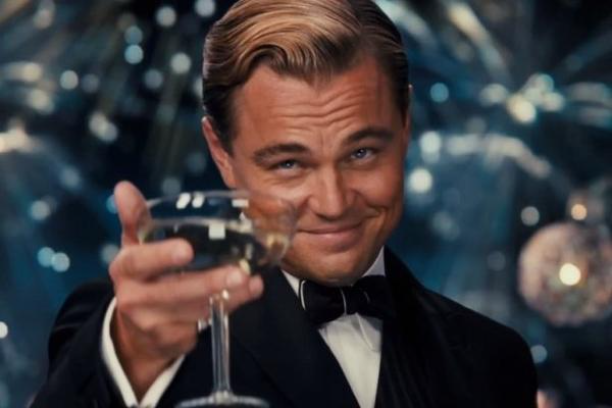

📝 Type your message:
🧠 Auto-detected context tag: encouragement
🤖 Selected Meme: leo_cheers.png


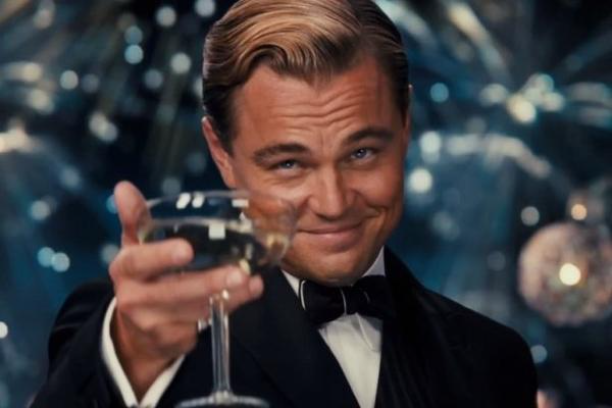

📝 Type your message:
🧠 Auto-detected context tag: doom
🤖 Selected Meme: expanding_brain.png


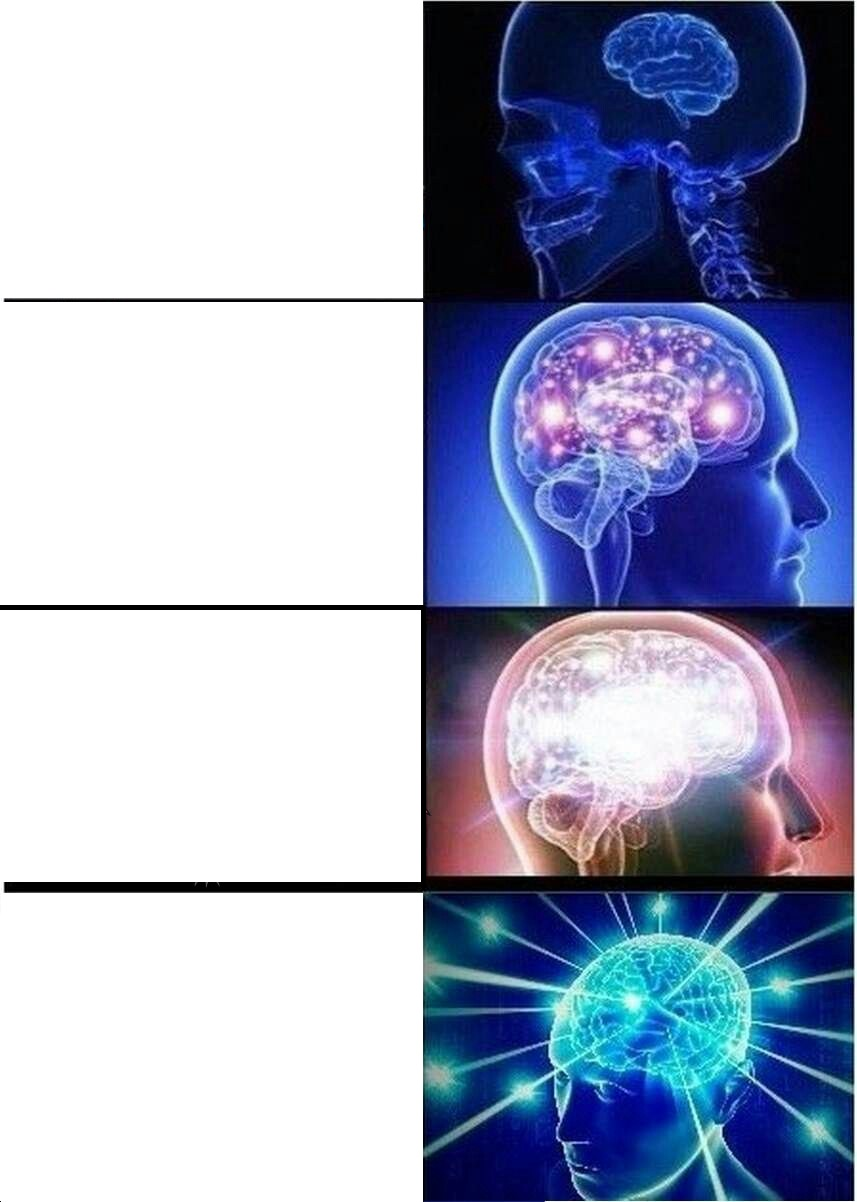

📝 Type your message:
🧠 Auto-detected context tag: agreement
🤖 Selected Meme: spic_handshake.png


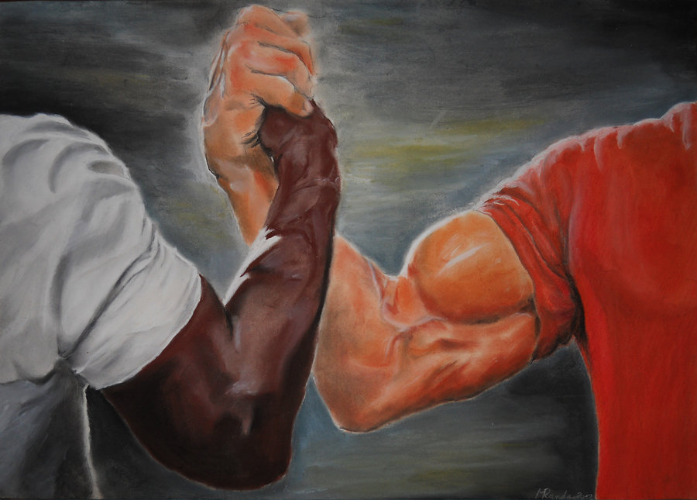

📝 Type your message:
quit


In [ ]:
if __name__ == "__main__":
    # Optimization Block
    print("🔄 Copying memes from Drive to local Colab environment...")
    start_copy_time = time.time()
    if os.path.exists(MEME_FOLDER_LOCAL):
        shutil.rmtree(MEME_FOLDER_LOCAL) # Remove old copy if it exists
    try:
        shutil.copytree(MEME_FOLDER_DRIVE, MEME_FOLDER_LOCAL)
        end_copy_time = time.time()
        print(f"✅ Memes copied locally in {end_copy_time - start_copy_time:.2f} seconds.")
    except Exception as e:
        print(f"❌ Error copying memes: {e}")
        # Decide how to handle this - maybe exit or fall back to Drive paths
        MEME_FOLDER_LOCAL = MEME_FOLDER_DRIVE # Fallback to using Drive directly if copy fails
    # --- End Add this block ---

    # 7.2 Init components
    MEME_FOLDER = '/content/drive/MyDrive/meme_rag/memes'  # your Drive path
    emb   = Embedder()
    ret   = Retriever()
    sel   = MemeSelector()
    rag   = SmartMemeRAGManager(emb, ret, sel)

    # 7.3 Index your memes
    ret.add_documents(meme_examples, emb)

    # 7.4 Create chat-bot
    bot = MemeAugmentedChatbot(rag, openai_key=openai_key, meme_folder=MEME_FOLDER)

    # 7.5 Chat loop
# === Chat Loop (v2.0) ===
print("🎉 Meme-Augmented Chatbot Ready (v2.0)! Type 'quit' to exit.")

while True:
    print("📝 Type your message:")
    user_msg = input()

    if user_msg.lower() in ("quit", "exit"):
        break

    # --- Get meme ---
    meme_filename = rag.run(user_msg)

    # --- Display result ---
    print(f"🤖 Selected Meme: {meme_filename}")

    if meme_filename and meme_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        bot.show_meme(meme_filename)
    else:
        print("⚠️ No suitable meme found.")

In [ ]:
bot.save_chatlog("memerag_saved_2_0.csv")


✅ Chat log saved as memerag_saved_2_0.csv


In [ ]:
bot.save_chatlog("my_funny_chat.csv")


✅ Chat log saved as my_funny_chat.csv
